# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Load in a Binaural Recording</h1>

Set up where the data is located. In this case, we'll use the sample recordings located under the `Field Rec` folder.

In [1]:
from pathlib import Path
wav_folder = Path().cwd().joinpath("Field Rec")

Ensuring that Soundscapy knows exactly how loud your recordings were onsite is crucial to getting correct answers. If you used equipment such as the Head Acoustics SqoBold, and were careful about how the recordings are exported to .wav, then they may already be correctly adjusted (as ours are here). However its best to be safe and calibrate each signal to their real-world dB level. To do this, we load in a .json that contains the per-channel correct dB $L_{eq}$ level.

In [2]:
import json

levels = wav_folder.joinpath("Levels.json")

with open("Field Rec/Levels.json") as f:
    levels= json.load(f)

list(levels.items())

[('1m', {'Left': 62.573, 'Right': 62.573}),
 ('2m', {'Left': 58.27, 'Right': 58.27}),
 ('3m', {'Left': 55.83, 'Right': 55.83}),
 ('5m', {'Left': 53.93, 'Right': 53.93}),
 ('10m', {'Left': 50.43, 'Right': 50.43}),
 ('15m', {'Left': 50.13, 'Right': 50.13})]

Load in a binaural wav signal. We can use the `plot` function provided by the `acoustics.Signal` super-class.

In [3]:
from soundscapy import Binaural

# Loading (you can load any wave under the Field Rec folder. We Chose "10m.wav")
binaural_wav = wav_folder.joinpath("10m.wav")
b = Binaural.from_wav(binaural_wav)

# Calibration
decibel = (levels[b.recording]["Left"], levels[b.recording]["Left"])

b = Binaural.from_wav(binaural_wav, calibrate_to=decibel)

c:\Users\fspintern1\AppData\Local\Programs\Python\Python311\Lib\site-packages\acoustics\_signal.py:1048: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(filename)


# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Run All Soundscapy Tests</h1>

In [5]:
# import pandas as pd

# # Set display options
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows
# pd.set_option('display.width', None)        # Set width to fit the entire DataFrame

from soundscapy import AnalysisSettings
from soundscapy.analysis.binaural import prep_multiindex_df, add_results, process_all_metrics

    
df = prep_multiindex_df(levels, incl_metric=False)
ex_settings = AnalysisSettings.from_yaml(Path("ex_settings.yaml"))

df = b.pyacoustics_metric("LAeq", analysis_settings = ex_settings)
df = add_results(df, b.mosqito_metric("loudness_zwtv", analysis_settings = ex_settings))
df = add_results(df, b.mosqito_metric("sharpness_din_from_loudness", analysis_settings = ex_settings))
df = add_results(df, b.mosqito_metric("roughness_dw", analysis_settings = ex_settings))
df 

<h1 style="color:orange ; font-weight: bold; font-style: italic;">Save the File as an Excel File</h1>

In [ ]:
from datetime import datetime
df.to_excel(wav_folder.parent.joinpath("", f"AllTest_{datetime.today().strftime('%Y-%m-%d')}.xlsx"))

# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Plot Binaural Graph</h1>

<Axes: title={'center': 'Binaural - 10m.wav'}, xlabel='$t$ in s', ylabel='$x$ in -'>

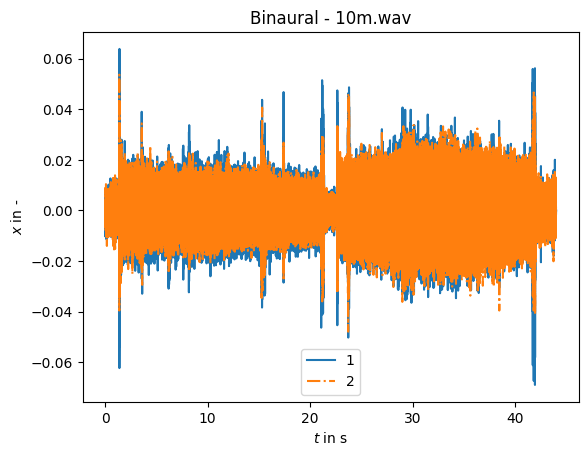

In [6]:
# Plotting
b.plot(title='Binaural - ' + binaural_wav.name)

# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Plot Mel-Frequency Spectrogram</h1>

[Text(0.5, 1.0, 'Mel-frequency spectrogram - 10m.wav')]

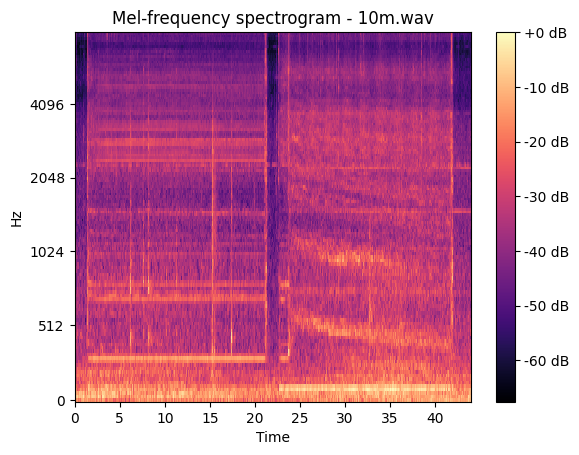

In [7]:
import librosa
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

wav_folder = Path().cwd().joinpath("Field Rec")

# Loading (you can load any wave under the Field Rec folder. We Chose "10m.wav")
binaural_wav = wav_folder.joinpath("10m.wav")
   
y, sr = librosa.load(binaural_wav)
librosa.feature.melspectrogram(y=y, sr=sr)


D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram - ' + binaural_wav.name)

# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Plot Magnitude for Specific Frequencies</h1>

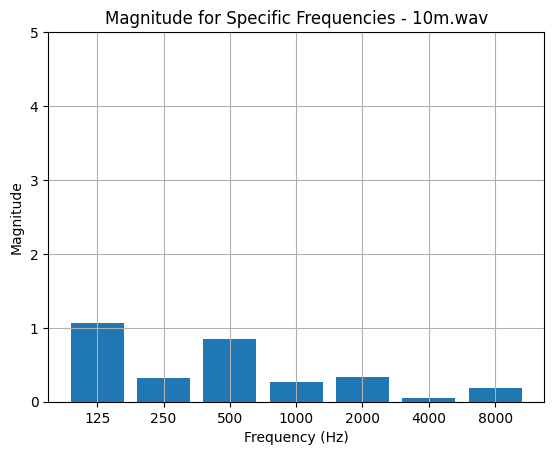

In [9]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


sound_data, sampling_rate = librosa.load(binaural_wav, sr=None)
# Calculate the FFT magnitude
fft_magnitude = np.abs(np.fft.fft(sound_data))

# Frequencies of interest
frequencies = [125, 250, 500, 1000, 2000, 4000, 8000]

# Find the indices corresponding to the frequencies of interest
indices = []
for freq in frequencies:
    index = int(freq * len(fft_magnitude) / sampling_rate)
    indices.append(index)

# Extract the magnitudes for the frequencies of interest
magnitudes = fft_magnitude[indices]

# Plot a bar chart of the magnitudes
plt.bar(np.arange(len(frequencies)), magnitudes)
plt.xticks(np.arange(len(frequencies)), frequencies)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0, 5)
plt.title('Magnitude for Specific Frequencies - ' + binaural_wav.name)
plt.grid(True)
plt.show()
